In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [102]:
df = pd.read_csv('/Users/nivasm/Documents/UTA ASSIGNMENTS/DATA VISUALIZATION/Inclass_Practice/Young people survey/responses.csv')

In [103]:
print(df.head())


   Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0    5.0                       3.0    2.0   1.0      2.0              2.0   
1    4.0                       4.0    2.0   1.0      1.0              1.0   
2    5.0                       5.0    2.0   2.0      3.0              4.0   
3    5.0                       3.0    2.0   1.0      1.0              1.0   
4    5.0                       3.0    4.0   3.0      2.0              4.0   

   Musical  Pop  Rock  Metal or Hardrock  ...   Age  Height  Weight  \
0      1.0  5.0   5.0                1.0  ...  20.0   163.0    48.0   
1      2.0  3.0   5.0                4.0  ...  19.0   163.0    58.0   
2      5.0  3.0   5.0                3.0  ...  20.0   176.0    67.0   
3      1.0  2.0   2.0                1.0  ...  22.0   172.0    59.0   
4      3.0  5.0   3.0                1.0  ...  20.0   170.0    59.0   

   Number of siblings  Gender  Left - right handed                Education  \
0                 1.0  female  

In [104]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB
None


In [105]:
# Fears Columns
fears = ['Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']

# Demographic Columns
demographics = ['Age', 'Gender', 'Education', 'Village - town']
print(df[fears + demographics].isnull().sum())

Storm                      1
Darkness                   2
Heights                    3
Spiders                    5
Snakes                     0
Rats                       3
Ageing                     1
Dangerous dogs             1
Fear of public speaking    1
Age                        7
Gender                     6
Education                  1
Village - town             4
dtype: int64


In [106]:

df['Gender'] = df['Gender'].map({'male': 'Male', 'female': 'Female'})

df['Village - town'] = df['Village - town'].map({'village': 'Village', 'city': 'City'})

print(df[['Gender', 'Village - town']].head())


   Gender Village - town
0  Female        Village
1  Female           City
2  Female           City
3  Female           City
4  Female        Village


In [107]:
original_df = df.copy()

In [108]:
original_df.fillna(method='ffill', inplace=True)

In [109]:
print(original_df[fears + demographics].isnull().sum())

Storm                      0
Darkness                   0
Heights                    0
Spiders                    0
Snakes                     0
Rats                       0
Ageing                     0
Dangerous dogs             0
Fear of public speaking    0
Age                        0
Gender                     0
Education                  0
Village - town             0
dtype: int64


/var/folders/5v/1f87_8ss0z3_1vz8yv1kv37w0000gn/T/ipykernel_50156/4024868303.py:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



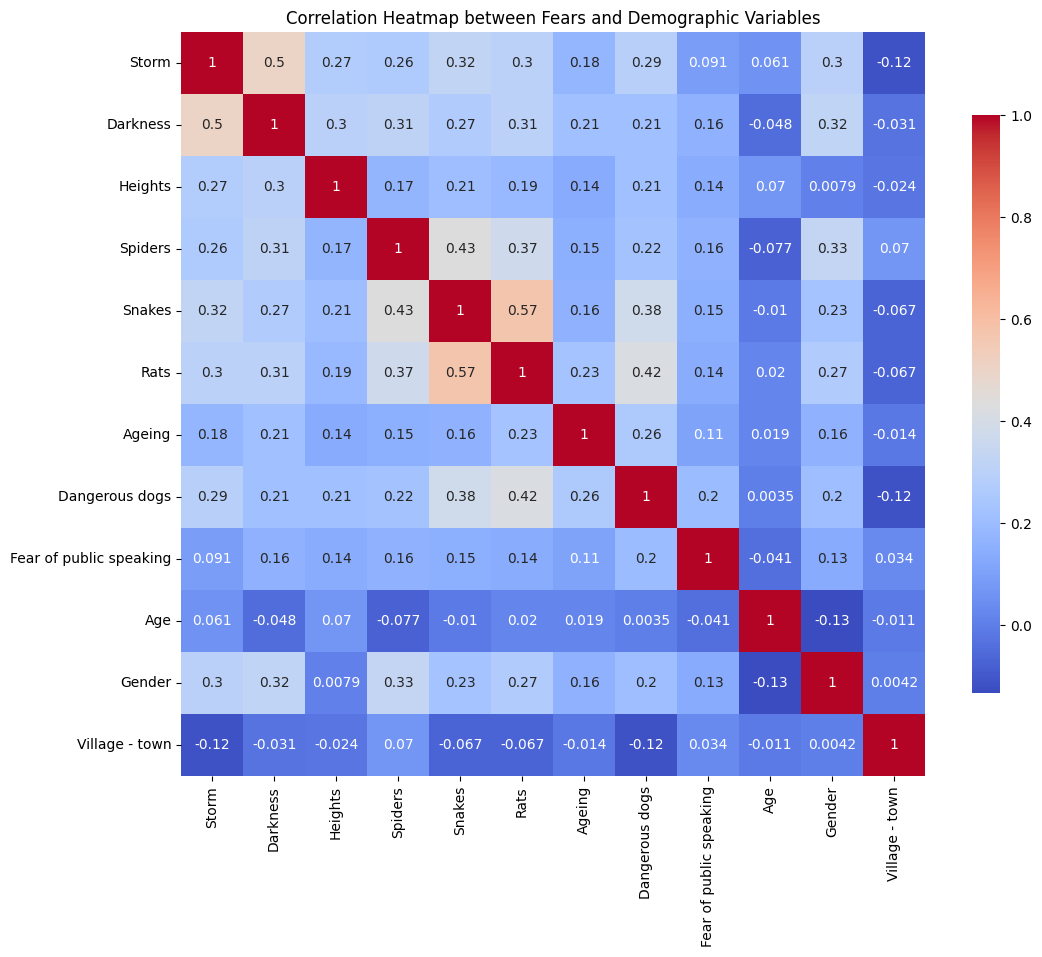

In [110]:

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 2})
df['Village - town'] = df['Village - town'].map({'Village': 1, 'City': 2})

fears = ['Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
demographics = ['Age', 'Gender', 'Education', 'Village - town']

correlation_matrix = df[fears + demographics].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .75})
plt.title('Correlation Heatmap between Fears and Demographic Variables')
plt.show()


In [111]:

threshold = 6

for column in fears + demographics:
    unique_values = original_df[column].nunique()
    if unique_values <= threshold:
        print(f"{column}: Categorical (Unique values: {unique_values})")
    else:
        print(f"{column}: Not Categorical (Unique values: {unique_values})")



Storm: Categorical (Unique values: 5)
Darkness: Categorical (Unique values: 5)
Heights: Categorical (Unique values: 5)
Spiders: Categorical (Unique values: 5)
Snakes: Categorical (Unique values: 5)
Rats: Categorical (Unique values: 5)
Ageing: Categorical (Unique values: 5)
Dangerous dogs: Categorical (Unique values: 5)
Fear of public speaking: Categorical (Unique values: 5)
Age: Not Categorical (Unique values: 16)
Gender: Categorical (Unique values: 2)
Education: Categorical (Unique values: 6)
Village - town: Categorical (Unique values: 2)


In [112]:
def map_values(val):
    if val in [0, 1]:
        return 'Low'
    elif val in [2, 3]:
        return 'Medium'
    else:
        return 'High'

columns_to_map = ['Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']

original_df[columns_to_map] = original_df[columns_to_map].applymap(map_values)

print(df)


      Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0       5.0                       3.0    2.0   1.0      2.0              2.0   
1       4.0                       4.0    2.0   1.0      1.0              1.0   
2       5.0                       5.0    2.0   2.0      3.0              4.0   
3       5.0                       3.0    2.0   1.0      1.0              1.0   
4       5.0                       3.0    4.0   3.0      2.0              4.0   
...     ...                       ...    ...   ...      ...              ...   
1005    5.0                       2.0    5.0   2.0      2.0              5.0   
1006    4.0                       4.0    5.0   1.0      3.0              4.0   
1007    4.0                       3.0    1.0   1.0      2.0              2.0   
1008    5.0                       3.0    3.0   3.0      1.0              3.0   
1009    5.0                       5.0    4.0   3.0      2.0              3.0   

      Musical  Pop  Rock  Metal or Hard

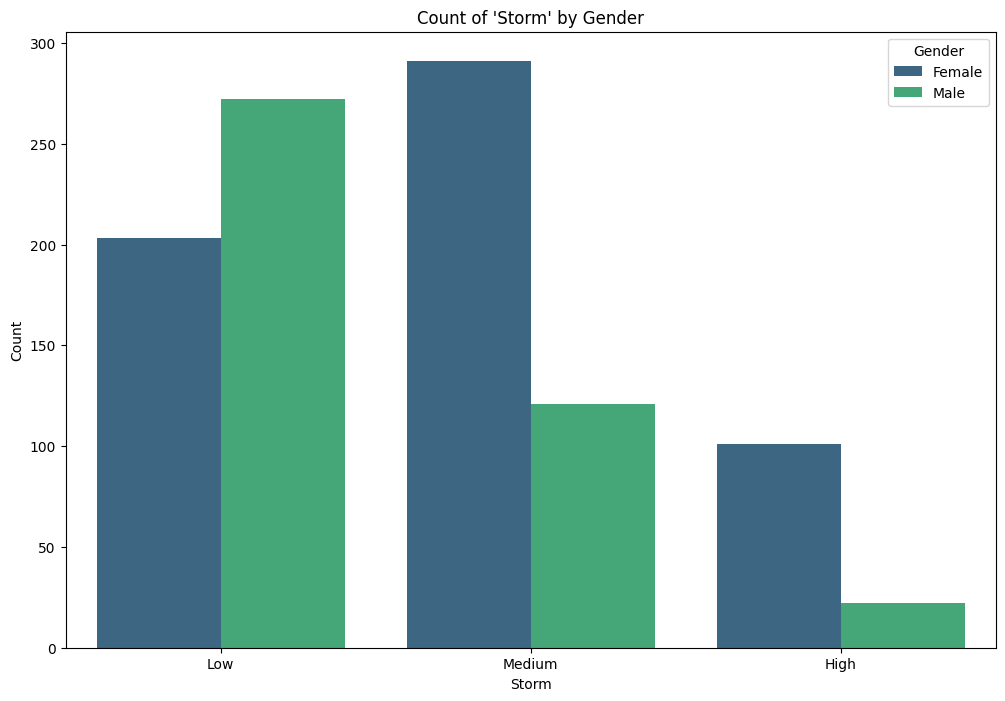

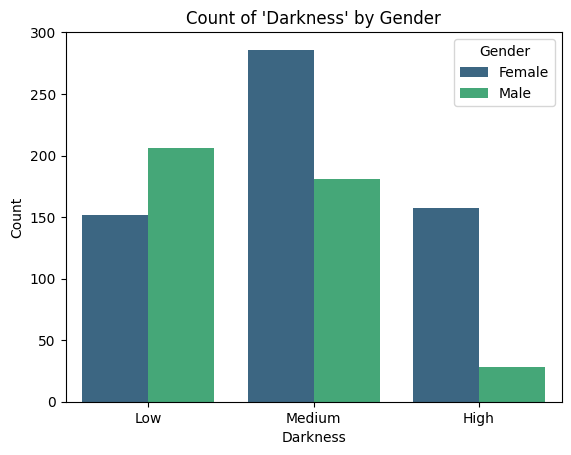

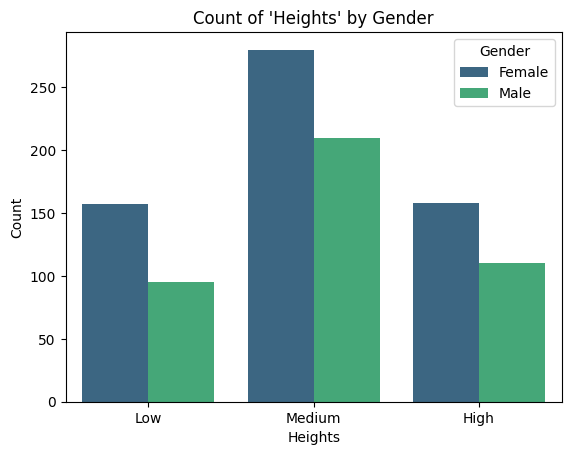

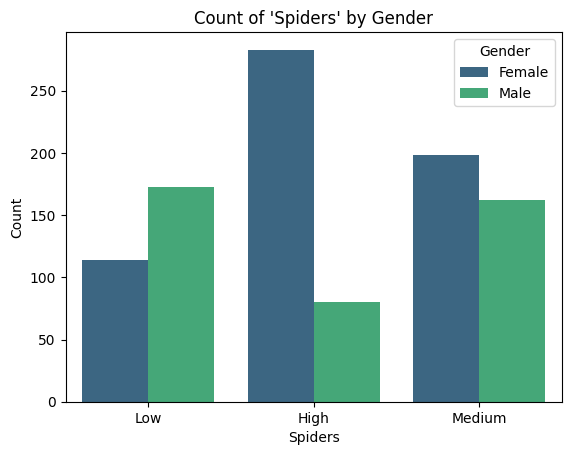

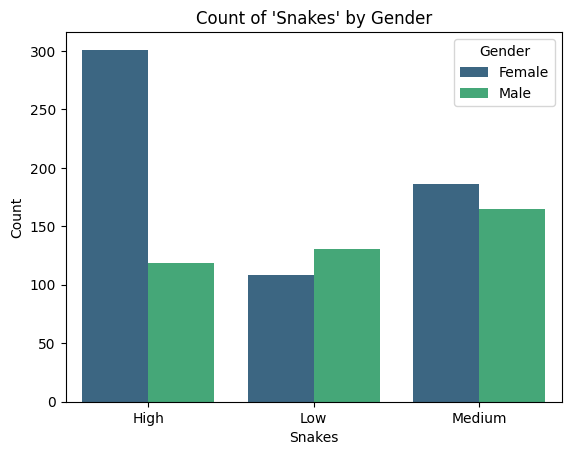

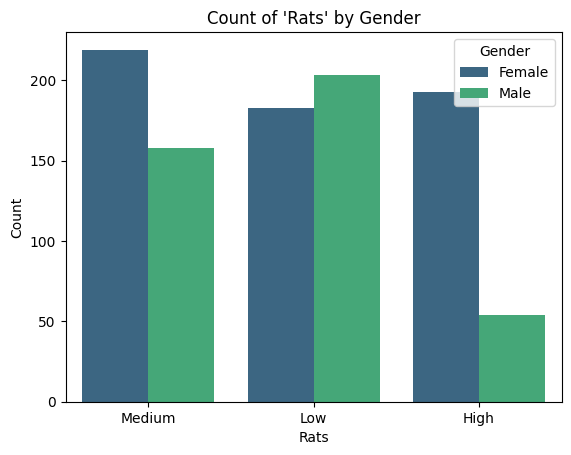

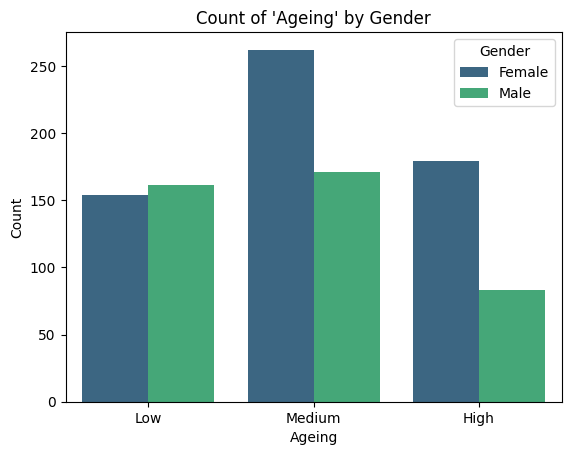

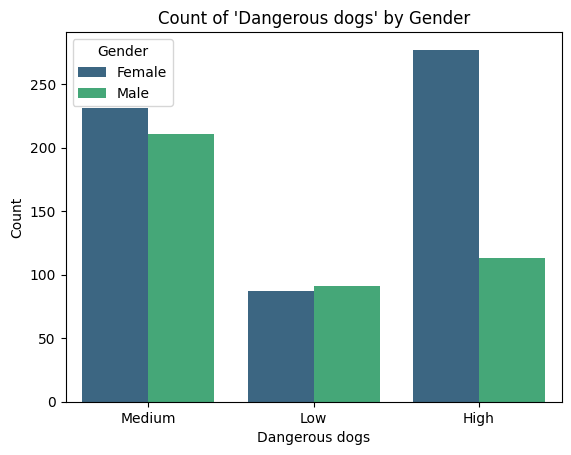

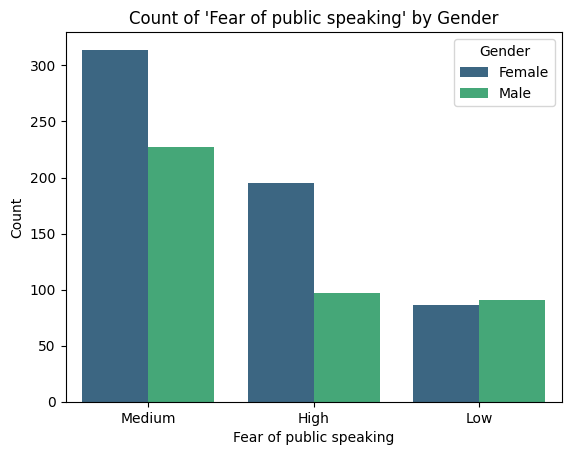

In [113]:
plt.figure(figsize=(12, 8))
for fear in fears:
    sns.countplot(data=original_df, x=fear, hue='Gender', palette="viridis")
    plt.title(f"Count of '{fear}' by Gender")
    plt.xlabel(fear)
    plt.ylabel("Count")
    plt.legend(title="Gender")
    plt.show()

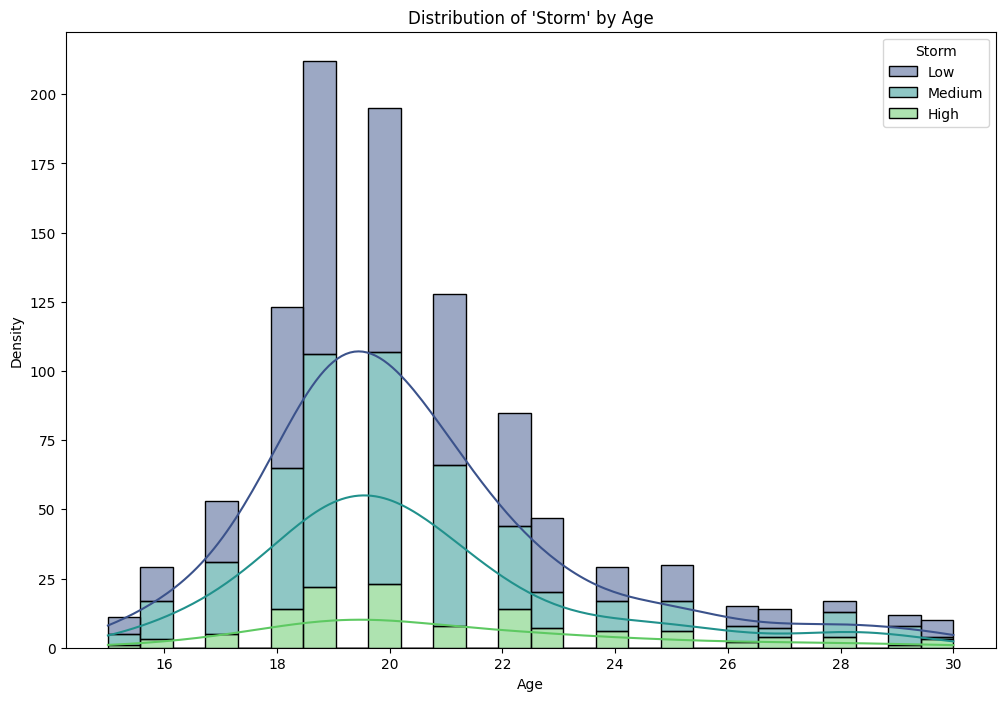

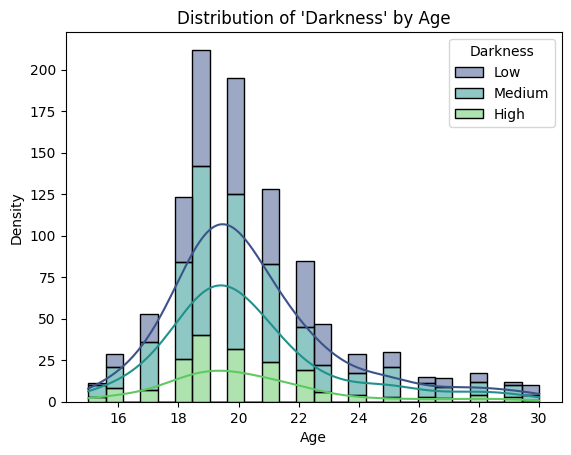

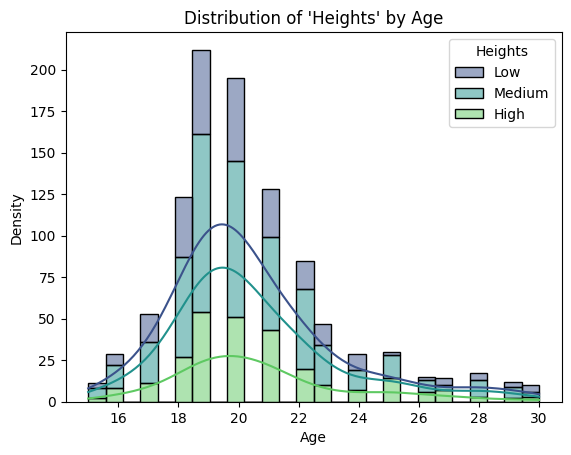

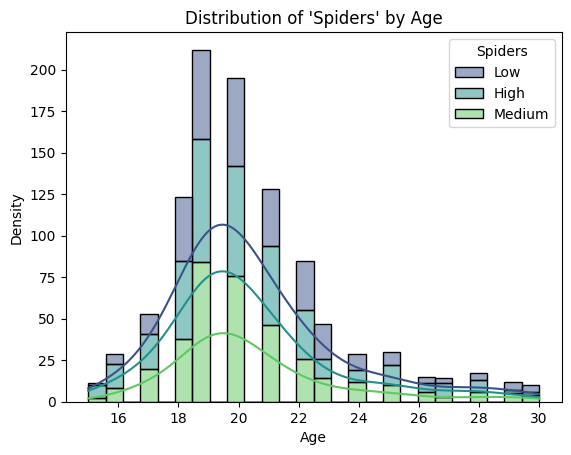

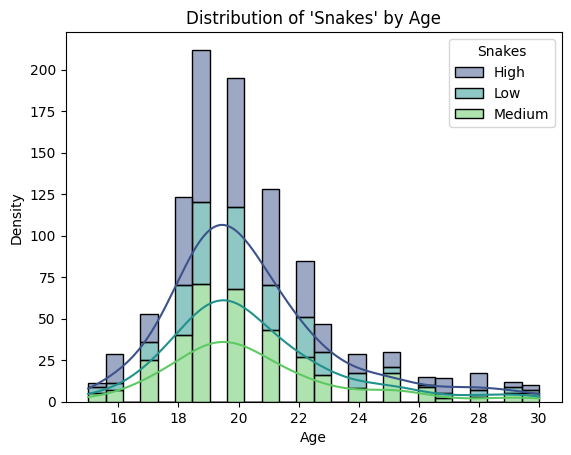

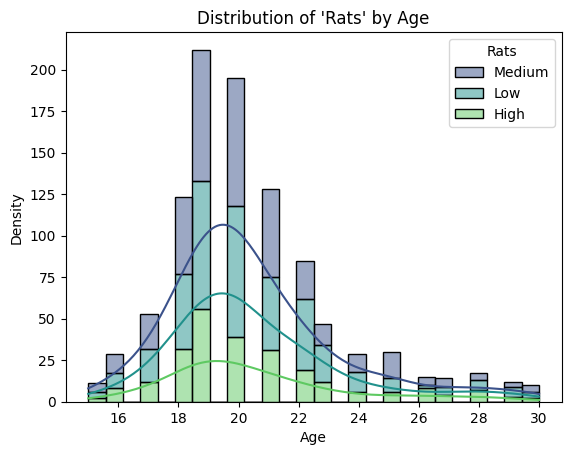

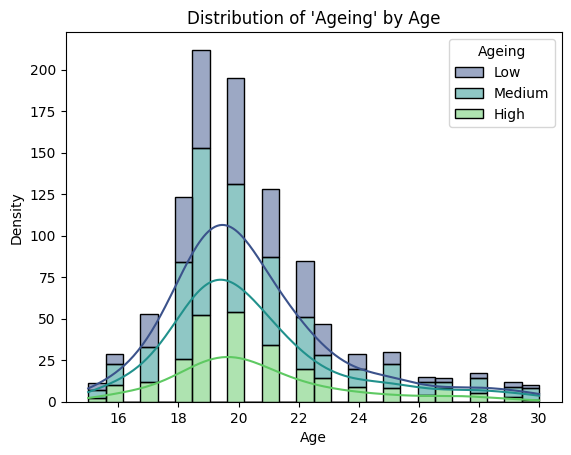

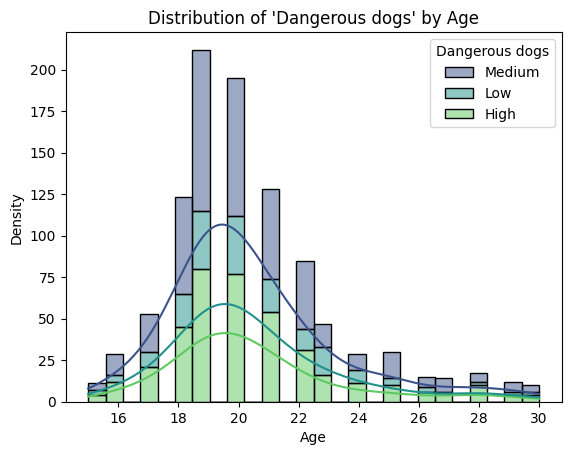

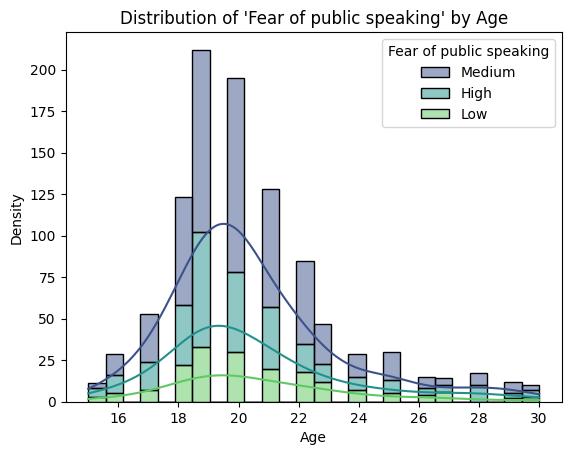

In [114]:
plt.figure(figsize=(12, 8))
for fear in fears:
    sns.histplot(data=original_df, x='Age', hue=fear, multiple="stack", kde=True, palette="viridis")
    plt.title(f"Distribution of '{fear}' by Age")
    plt.xlabel("Age")
    plt.ylabel("Density")
    plt.show()

In [115]:
fears = ['Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']

for fear in fears:
    fear_data = original_df.groupby([fear, 'Gender']).size().reset_index(name='Count')
    
    fig = px.bar(
        fear_data, 
        x=fear, 
        y="Count", 
        color="Gender", 
        barmode="group",
        color_discrete_sequence=px.colors.sequential.Viridis,
        title=f"Count of '{fear}' by Gender",
        labels={fear: fear, 'Count': 'Count'}
    )
    
    fig.update_layout(
        xaxis_title=fear,
        yaxis_title="Count",
        legend_title="Gender",
        template="plotly_white"
    )
    
    fig.show()

In [116]:
fears = ['Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
demographics = ['Age', 'Gender', 'Education', 'Village - town']

correlation_matrix = original_df[fears + demographics].head()
correlation_matrix

,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Age,Gender,Education,Village - town
0,Low,Low,Low,Low,High,Medium,Low,Medium,Medium,20.0,Female,college/bachelor degree,Village
1,Low,Low,Medium,Low,Low,Low,Medium,Low,High,19.0,Female,college/bachelor degree,City
2,Low,Low,Low,Low,Low,Low,Low,Low,Medium,20.0,Female,secondary school,City
3,Low,Low,Medium,High,High,High,High,High,High,22.0,Female,college/bachelor degree,City
4,Medium,Low,Low,Low,Low,Medium,Medium,High,Medium,20.0,Female,secondary school,Village


Chi-Square Test Function: We defined a function chi_square_test() that takes the DataFrame, the list of fear columns, and demographic columns, performs the Chi-Square test on the contingency table, and stores the results.

In [117]:
def chi_square_test(df, fear_columns, demographic_columns):
    results = {}
 
    for demographic in demographic_columns:
        for fear in fear_columns:
            contingency_table = pd.crosstab(df[demographic], df[fear])
            
            chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
            
            results[f"{fear} vs {demographic}"] = {
                'Chi2': chi2,
                'p-value': p,
                'Degrees of Freedom': dof,
                'Expected Frequencies': expected
            }
    
    return results

fear_columns = ['Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
demographic_columns = ['Age', 'Gender', 'Village - town']

test_results = chi_square_test(df, fear_columns, demographic_columns)

for test, result in test_results.items():
    print(f"Test: {test}")
    print(f"Chi2 Value: {result['Chi2']}")
    print(f"P-Value: {result['p-value']}")
    print(f"Degrees of Freedom: {result['Degrees of Freedom']}")
    # print(f"Expected Frequencies:\n{result['Expected Frequencies']}")
    print('-' * 50)


Test: Storm vs Age
Chi2 Value: 67.56041288111983
P-Value: 0.234707021020655
Degrees of Freedom: 60
--------------------------------------------------
Test: Darkness vs Age
Chi2 Value: 52.95252520499797
P-Value: 0.7287014539762746
Degrees of Freedom: 60
--------------------------------------------------
Test: Heights vs Age
Chi2 Value: 66.2154299268411
P-Value: 0.2711627721405323
Degrees of Freedom: 60
--------------------------------------------------
Test: Spiders vs Age
Chi2 Value: 62.40987430410571
P-Value: 0.39057605682420726
Degrees of Freedom: 60
--------------------------------------------------
Test: Snakes vs Age
Chi2 Value: 65.48483556022086
P-Value: 0.2923062142671915
Degrees of Freedom: 60
--------------------------------------------------
Test: Rats vs Age
Chi2 Value: 69.37014856692495
P-Value: 0.19087916167666047
Degrees of Freedom: 60
--------------------------------------------------
Test: Ageing vs Age
Chi2 Value: 56.29316241147956
P-Value: 0.6119454076563972
Degrees o

In [72]:
original_df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,Female,right handed,college/bachelor degree,no,Village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,Female,right handed,college/bachelor degree,no,City,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,Female,right handed,secondary school,no,City,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,Female,right handed,college/bachelor degree,yes,City,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,Female,right handed,secondary school,no,Village,house/bungalow



Cluster Sizes:
0    635
1    375
dtype: int64

Cluster Profiles (Mean Values):
Empty DataFrame
Columns: []
Index: [0, 1]


/var/folders/5v/1f87_8ss0z3_1vz8yv1kv37w0000gn/T/ipykernel_50156/1972038834.py:80: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



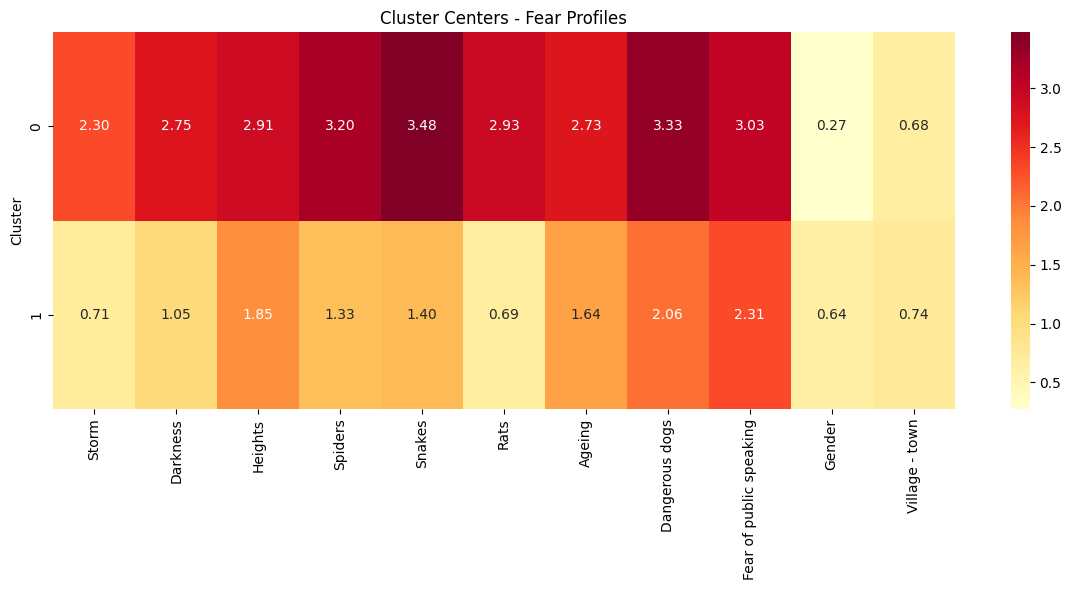

In [78]:

fear_columns = ['Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
demographic_columns = ['Age', 'Gender', 'Village - town']

def perform_fear_clustering(df, columns_to_cluster, n_clusters=3):
    
    fear_mapping = {'Low': [0, 1], 'Medium': [2, 3], 'High': [4, 5]}
    
    df_encoded = df.copy()
    for column in columns_to_cluster:
        
        df_encoded[column] = df[column].apply(lambda x: fear_mapping[x][0] if x == 'Low' else (fear_mapping[x][1] if x == 'Medium' else fear_mapping[x][0]))
    
    df_encoded['Gender'] = df_encoded['Gender'].map({'Female': 0, 'Male': 1})
    df_encoded['Village - town'] = df_encoded['Village - town'].map({'Village': 0, 'City': 1})

    X = df_encoded[columns_to_cluster + ['Gender', 'Village - town']].values

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    silhouette_scores = []
    K = range(2, 7)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        score = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(score)
    
    optimal_k = K[np.argmax(silhouette_scores)]
    
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    
    df_clustered = df.copy()
    df_clustered['Cluster'] = clusters
    
    cluster_centers = pd.DataFrame(
        scaler.inverse_transform(kmeans.cluster_centers_),
        columns=columns_to_cluster + ['Gender', 'Village - town']
    )
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(cluster_centers, annot=True, cmap='YlOrRd', fmt='.2f')
    plt.title('Cluster Centers - Fear Profiles')
    plt.ylabel('Cluster')
    plt.tight_layout()
    
    print("\nCluster Sizes:")
    print(pd.Series(clusters).value_counts().sort_index())
    
    print("\nCluster Profiles (Mean Values):")
    print(df_clustered.groupby('Cluster')[columns_to_cluster + ['Gender', 'Village - town']].mean())
    
    return df_clustered, cluster_centers, silhouette_scores

df_clustered, centers, scores = perform_fear_clustering(original_df, fear_columns)




Cluster Sizes:
0    641
1    369
dtype: int64

Demographic Insights by Cluster:
               Age
Cluster           
0        20.360374
1        20.590786

Demographic Distribution by Cluster:
                                                       Age  \
Cluster                                                      
0        {19.0: 143, 20.0: 126, 18.0: 84, 21.0: 82, 22....   
1        {20.0: 69, 19.0: 69, 21.0: 46, 22.0: 42, 18.0:...   

                               Gender                 Village - town  
Cluster                                                               
0        {'Female': 446, 'Male': 195}  {'City': 435, 'Village': 206}  
1        {'Male': 220, 'Female': 149}   {'City': 274, 'Village': 95}  


/var/folders/5v/1f87_8ss0z3_1vz8yv1kv37w0000gn/T/ipykernel_50156/3870907488.py:64: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



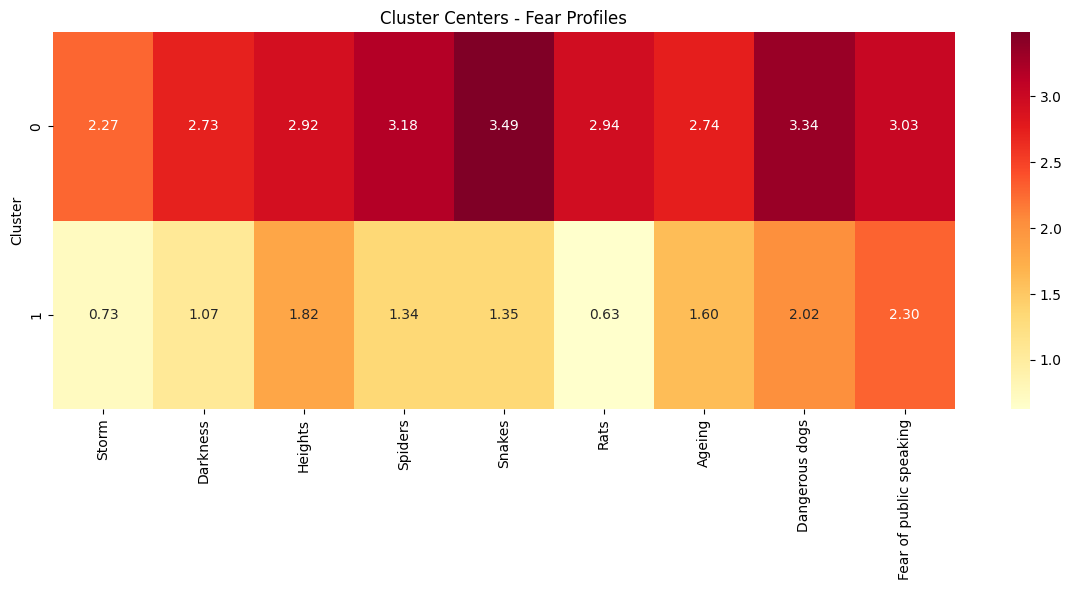

In [88]:
def perform_fear_clustering_with_demographics(df, columns_to_cluster, n_clusters=3):

    fear_mapping = {'Low': [0, 1], 'Medium': [2, 3], 'High': [4, 5]}
    
    df_encoded = df.copy()
    for column in columns_to_cluster:
        df_encoded[column] = df[column].apply(lambda x: fear_mapping[x][0] if x == 'Low' else (fear_mapping[x][1] if x == 'Medium' else fear_mapping[x][0]))
    
   
    X_fear = df_encoded[columns_to_cluster].values
    
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_fear)
    
    silhouette_scores = []
    K = range(2, 7)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        score = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(score)
    

    optimal_k = K[np.argmax(silhouette_scores)]
 
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    
    df_clustered = df.copy()
    df_clustered['Cluster'] = clusters
    
    cluster_centers = pd.DataFrame(
        scaler.inverse_transform(kmeans.cluster_centers_),
        columns=columns_to_cluster
    )
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(cluster_centers, annot=True, cmap='YlOrRd', fmt='.2f')
    plt.title('Cluster Centers - Fear Profiles')
    plt.ylabel('Cluster')
    plt.tight_layout()
    
    print("\nCluster Sizes:")
    print(pd.Series(clusters).value_counts().sort_index())
    
    print("\nDemographic Insights by Cluster:")
    print(df_clustered.groupby('Cluster')[['Age', 'Gender', 'Village - town']].mean())
    print("\nDemographic Distribution by Cluster:")
    print(df_clustered.groupby('Cluster')[['Age', 'Gender', 'Village - town']].agg(lambda x: x.value_counts().to_dict()))
    
    return df_clustered, cluster_centers, silhouette_scores

df_clustered, centers, scores = perform_fear_clustering_with_demographics(original_df, fear_columns)


/var/folders/5v/1f87_8ss0z3_1vz8yv1kv37w0000gn/T/ipykernel_50156/4223173420.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




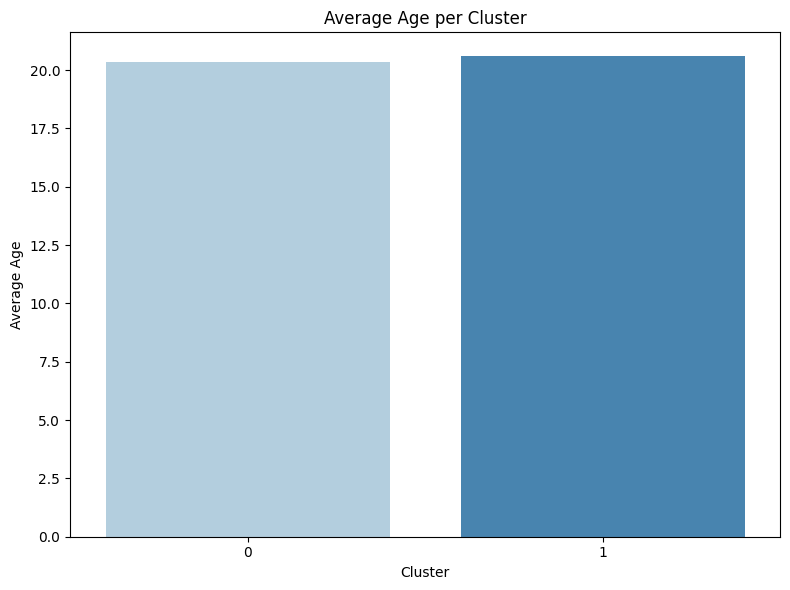

In [97]:
demographic_insights = df_clustered.groupby('Cluster')[['Age']].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=demographic_insights.index, y=demographic_insights['Age'], palette='Blues')
plt.title('Average Age per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Age')
plt.tight_layout()
plt.show()


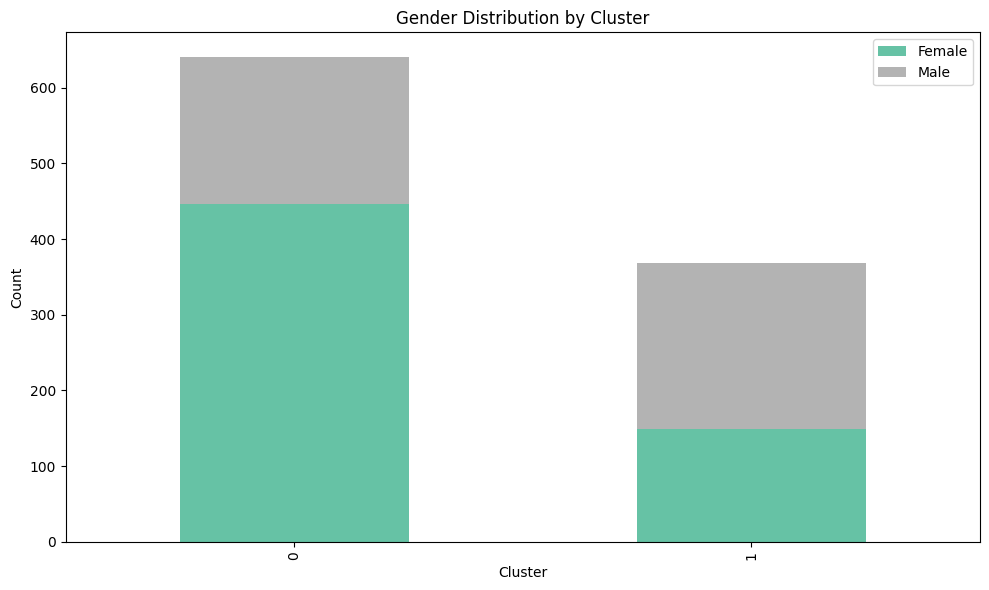

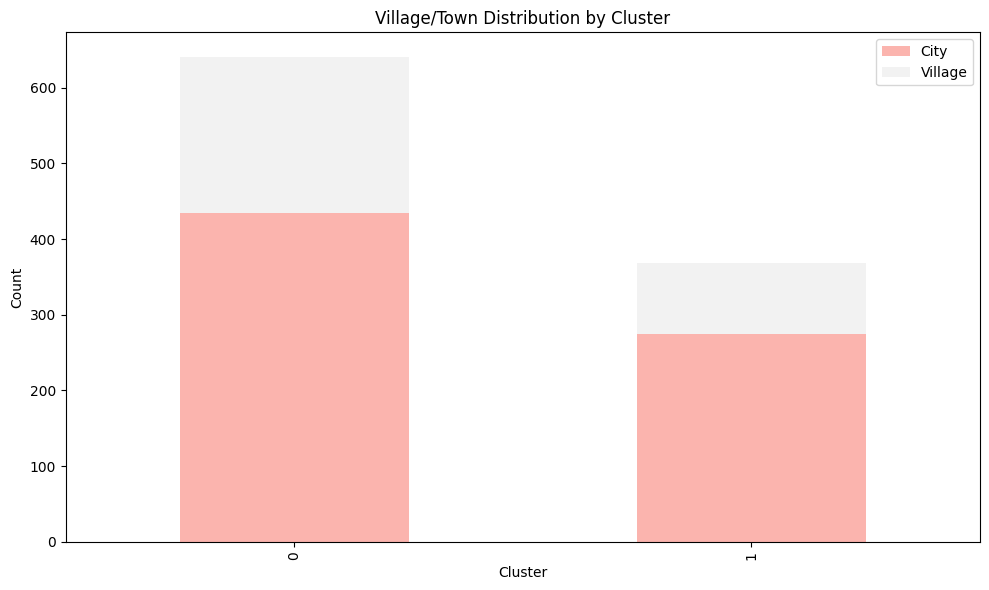

In [98]:
demographic_distribution = df_clustered.groupby('Cluster')[['Gender', 'Village - town']].agg(lambda x: x.value_counts().to_dict())

gender_counts = demographic_distribution['Gender'].apply(pd.Series).fillna(0)
gender_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Gender Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

village_counts = demographic_distribution['Village - town'].apply(pd.Series).fillna(0)
village_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Pastel1')
plt.title('Village/Town Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [90]:

fear_mapping = {
    'Low': [0, 1],
    'Medium': [2, 3],
    'High': [4, 5]
}

def encode_fear_column(column):
    return column.apply(lambda x: fear_mapping[x][0] if x == 'Low' else (fear_mapping[x][1] if x == 'Medium' else fear_mapping[x][0]))

original_df_encoded = original_df.copy()
for column in ['Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']:
    original_df_encoded[column] = encode_fear_column(original_df[column])

original_df_encoded['Gender'] = original_df['Gender'].map({'Female': 0, 'Male': 1})
original_df_encoded['Village - town'] = original_df['Village - town'].map({'Village': 0, 'City': 1})

features = ['Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking', 'Village - town']
target = 'Gender'

X = original_df_encoded[features]
y = original_df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42, max_iter=1000)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Female', 'Male']))


Accuracy: 0.7162

Classification Report:
              precision    recall  f1-score   support

      Female       0.74      0.83      0.78       186
        Male       0.67      0.53      0.59       117

    accuracy                           0.72       303
   macro avg       0.70      0.68      0.69       303
weighted avg       0.71      0.72      0.71       303



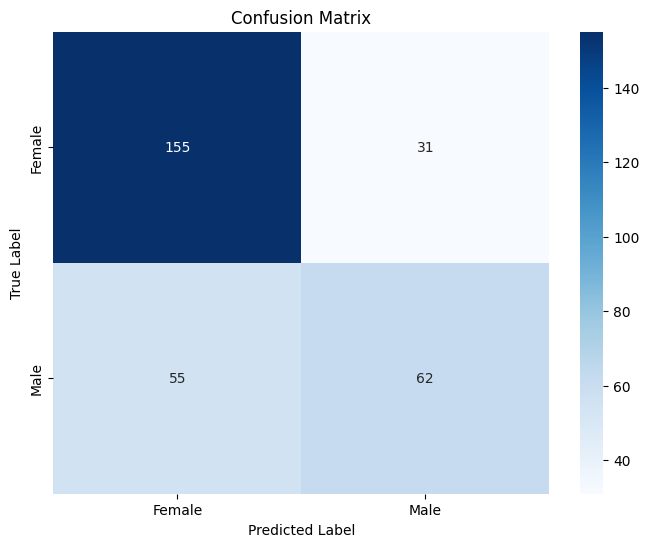

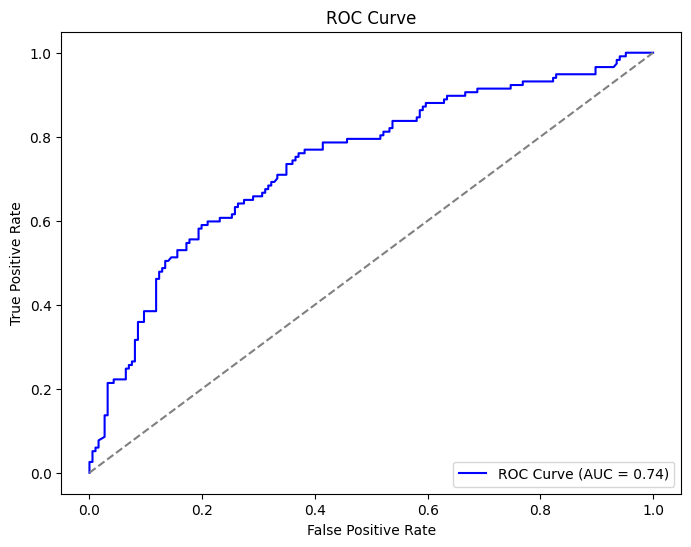

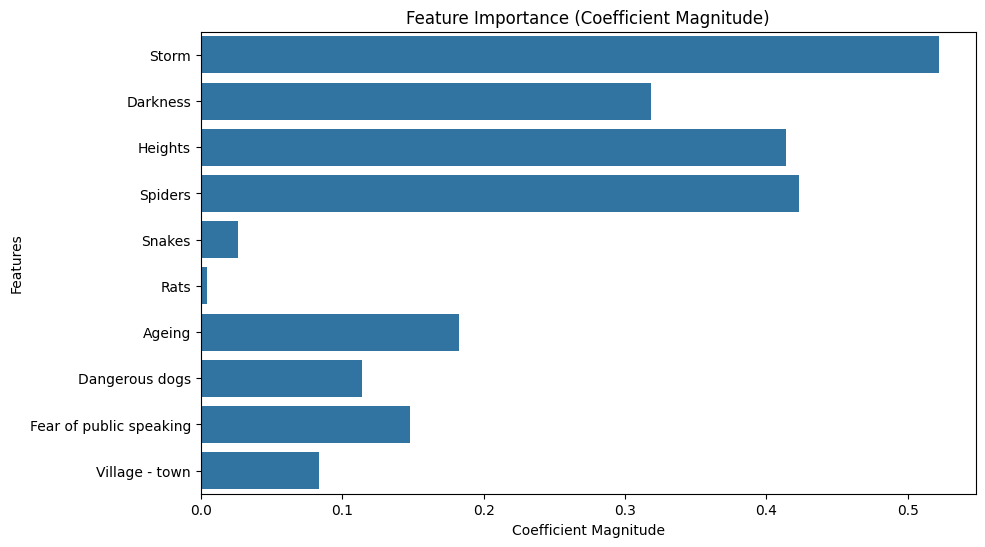

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

y_prob = model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

feature_importance = np.abs(model.coef_[0])
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance (Coefficient Magnitude)')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.show()


In [73]:
print(original_df[fears + demographics].head())

    Storm Darkness Heights Spiders Snakes    Rats  Ageing Dangerous dogs  \
0     Low      Low     Low     Low   High  Medium     Low         Medium   
1     Low      Low  Medium     Low    Low     Low  Medium            Low   
2     Low      Low     Low     Low    Low     Low     Low            Low   
3     Low      Low  Medium    High   High    High    High           High   
4  Medium      Low     Low     Low    Low  Medium  Medium           High   

  Fear of public speaking   Age  Gender                Education  \
0                  Medium  20.0  Female  college/bachelor degree   
1                    High  19.0  Female  college/bachelor degree   
2                  Medium  20.0  Female         secondary school   
3                    High  22.0  Female  college/bachelor degree   
4                  Medium  20.0  Female         secondary school   

  Village - town  
0        Village  
1           City  
2           City  
3           City  
4        Village  
